## Adding a method to `ocetrac`

### 1. Import libraries

In [7]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tracker import Tracker

### 2. Load your dataset

In [8]:
hfdrake_path = "/pub/hfdrake/datasets/CM4_MHW_blobs/data_daily/"
ds = xr.open_mfdataset(f"{hfdrake_path}/*.ocean_daily.thetao*.nc", chunks={"time":1}).thetao.isel(zl=0)
labels = xr.open_dataset("/pub/mariant3/WarmWaterMasses/notebooks/02_mhw_metrics/data_ocetrac-labels/01860503-01901020_ocetrac-labels-region.nc")
ds

<xarray.DataArray 'thetao' (time: 1460, yh: 130, xh: 269)>
dask.array<getitem, shape=(1460, 130, 269), dtype=float32, chunksize=(1, 130, 269), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0186-01-01 12:00:00 ... 0189-12-31 12:00:00
  * xh       (xh) float64 -137.9 -137.7 -137.4 -137.2 ... -70.41 -70.16 -69.91
  * yh       (yh) float64 10.2 10.44 10.69 10.93 ... 38.48 38.68 38.87 39.07
    zl       float64 1.0
Attributes:
    long_name:      Sea Water Potential Temperature
    units:          degC
    cell_methods:   area:mean zl:mean yh:mean xh:mean time: mean
    cell_measures:  volume: volcello area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_potential_temperature

### 3. Create an instance to call the `Tracker()` class

#### For this you will need:

- ✅ `da` = `sst`, `anomaly`
- ✅ `radius` = `int`
- ✅ `timedim` = `time`
- ✅ `xdim` = `str`, the name of longitude coordinate in dataset
- ✅ `ydim` = `str`, the name of latitude coordinate in dataset

In [9]:
tracker = Tracker(
    da=ds,
    mask=None,
    radius=3,
    min_size_quartile=0.25,
    timedim='time',
    xdim='xh',
    ydim='yh',
    positive=True
)

### 4. `Tracker()` will run `ocetrac` normally and output the marine heatwave `labels`

In [10]:
labels = labels.sel(time=slice('0186','0189')).blobs
labels

<xarray.DataArray 'blobs' (time: 684, yh: 193, xh: 547)>
[72210564 values with dtype=float64]
Coordinates:
  * xh       (xh) float64 -137.9 -137.7 -137.4 ... -0.7242 -0.4758 -0.2274
  * yh       (yh) float64 8.222 8.469 8.716 8.963 ... 48.43 48.59 48.76 48.92
  * time     (time) object 0186-05-03 12:00:00 ... 0189-10-20 12:00:00

#### -> Now the user has the option to get the marine heatwave metrics:


### 4. We've added a python method `collect_surface_stats()` that collects the metrics for all the events identified 
```python

def collect_surface_stats(self, labels):

```

#### After running `Tracker()`. Running `tracker.collect_surface_stats(labels)` returns a pandas DataFrame with the statistics of each event at each timestep

In [12]:
df = tracker.collect_surface_stats(labels)

In [13]:
df

,id,dates,coords,centroid,duration,intensity_max,intensity_mean,intensity_min,intensity_cumulative,total_area,distance
0,3,"[0186-05-09 12:00:00, 0186-05-10 12:00:00, 018...","[([10.687478569214495, 10.687478569214495, 10....","[[-100.0, 14.0], [-100.0, 13.0], [-100.0, 13.0...",16,"[30.577562, 30.524511, 30.282787, 29.90784, 29...","[29.437998, 29.407696, 29.422234, 29.377981, 2...","[28.607817, 28.37463, 28.442465, 28.612474, 28...",454031.75,2235,"[[nan], [111.1949266445587], [0.0], [111.19492..."
1,6,"[0186-05-30 12:00:00, 0186-05-31 12:00:00, 018...","[([10.933041787532273, 10.933041787532273, 10....","[[-93.0, 13.0], [-93.0, 13.0], [-93.0, 12.0], ...",13,"[30.057089, 30.454035, 30.46838, 30.451525, 30...","[29.311945, 29.464386, 29.576717, 29.595345, 2...","[28.448698, 28.309492, 28.496428, 28.540184, 2...",329420.47,1558,"[[nan], [0.0], [111.1949266445587], [108.76499..."
2,22,[0186-07-20 12:00:00],"[([18.66104935115552, 18.66104935115552, 18.66...","[[-108.0, 23.0]]",1,[31.270472],[29.813925],[27.587831],13028.686,461,[[nan]]
3,25,"[0186-07-26 12:00:00, 0186-07-27 12:00:00, 018...","[([25.82802282930681, 25.82802282930681, 25.82...","[[-85.0, 28.0], [-86.0, 28.0], [-87.0, 28.0], ...",29,"[31.408276, 31.437366, 31.503633, 31.628426, 3...","[29.645166, 29.672773, 29.730291, 29.838388, 2...","[28.889091, 28.83733, 28.804953, 28.842989, 28...",1188257.9,2500,"[[nan], [98.1790181611464], [98.17901816114515..."
4,26,"[0186-08-03 12:00:00, 0186-08-04 12:00:00, 018...","[([20.54502229317784, 20.54502229317784, 20.54...","[[-110.0, 25.0], [-110.0, 25.0], [-110.0, 24.0...",32,"[31.636108, 31.620401, 31.84838, 32.26465, 32....","[29.981346, 29.97524, 30.070566, 30.144043, 30...","[27.698223, 27.66954, 27.685774, 27.989813, 27...",897098.06,2446,"[[nan], [0.0], [111.19492664455854], [101.5814..."
...,...,...,...,...,...,...,...,...,...,...,...
61,184,"[0189-09-03 12:00:00, 0189-09-04 12:00:00, 018...","[([21.012499247321283, 21.012499247321283, 21....","[[-110.0, 25.0], [-110.0, 25.0], [-110.0, 25.0]]",3,"[32.339622, 32.705437, 33.077084]","[30.464968, 30.416573, 30.598482]","[28.013126, 28.05437, 27.899927]",43877.99,635,"[[nan], [0.0], [0.0]]"
62,186,"[0189-09-13 12:00:00, 0189-09-14 12:00:00, 018...","[([8.22163897284192, 8.22163897284192, 8.22163...","[[-78.0, 15.0], [-79.0, 15.0], [-80.0, 15.0], ...",12,"[31.195784, 31.084225, 30.807394, 30.537033, 3...","[29.478268, 29.42465, 29.419956, 29.52307, 29....","[28.625645, 28.597101, 28.455843, 28.528925, 2...",234877.67,1908,"[[nan], [107.40596007597748], [107.40596007597..."
63,189,"[0189-09-27 12:00:00, 0189-09-28 12:00:00]","[([8.22163897284192, 8.22163897284192, 8.22163...","[[-78.0, 10.0], [-78.0, 10.0]]",2,"[30.451624, 30.501282]","[29.312654, 29.356041]","[28.93784, 28.912935]",12379.789,420,"[[nan], [0.0]]"
64,190,[0189-09-29 12:00:00],"[([16.03642806679678, 16.03642806679678, 16.03...","[[-82.0, 19.0]]",1,[30.597382],[29.263695],[28.464714],15597.549,556,[[nan]]


#### Dataframe:

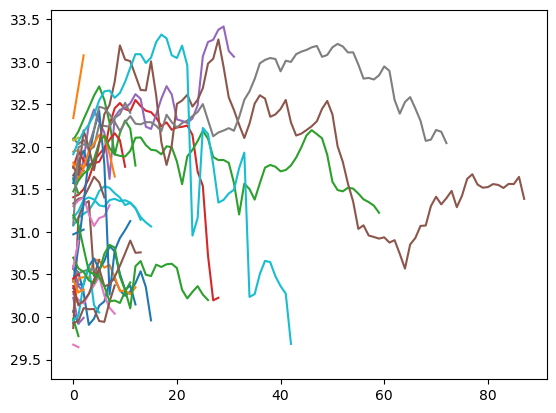

In [21]:
for i, series in enumerate(df.intensity_max):
    #print(series)
    plt.plot(series, label=f'Event {i+1}')

In [18]:
from datetime import datetime
import cftime
# Convert cftime.DatetimeNoLeap to datetime
def convert_to_datetime(cftime_obj):
    return datetime(cftime_obj.year, cftime_obj.month, cftime_obj.day,
                    cftime_obj.hour, cftime_obj.minute, cftime_obj.second)

# Assuming df.dates and df.intensity_max are already defined and loaded
# Convert all dates to datetime
dates_converted = [[convert_to_datetime(d) for d in date_list] for date_list in df.dates]

ValueError: x and y must have same first dimension, but have shapes (4,) and (1,)

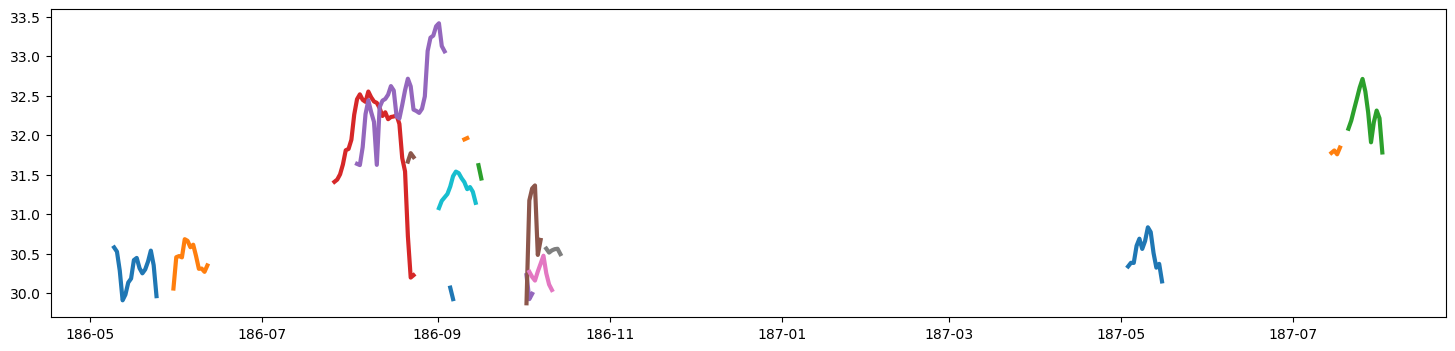

In [19]:
fig, ax = plt.subplots(figsize=(18, 4))

for i in range(len(df.intensity_max)):
    ax.plot(dates_converted[i], df.intensity_max[i], label=f'Event {i+1}', linewidth=3)

ValueError: x and y must have same first dimension, but have shapes (4,) and (1,)

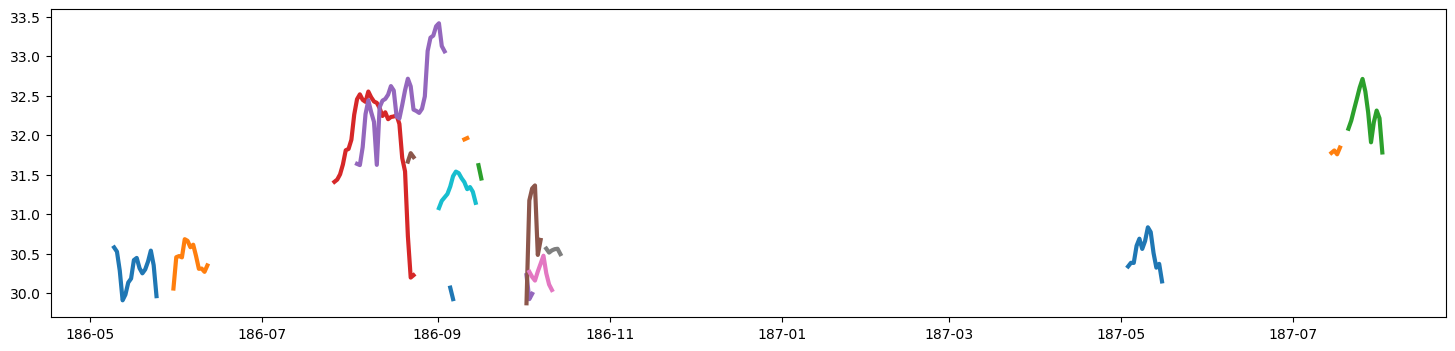

In [20]:
fig, ax = plt.subplots(figsize=(18, 4))

for i in range(len(df.intensity_max)):
    ax.plot(dates_converted[i], df.intensity_max[i], label=f'MHW {df.id[i]}', linewidth=3)